In [158]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("movie_dataset.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [160]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [161]:
df.shape

(4803, 24)

In [162]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [163]:
df[["genres", "keywords", "cast", "director"]] = df[["genres", "keywords", "cast", "director"]].fillna("")
df = df.drop(columns=["tagline", "homepage", "overview", "revenue", "status","runtime", "budget","index"])

In [164]:
df.describe()

,id,popularity,vote_average,vote_count
count,4803.000000,4803.000000,4803.000000,4803.000000
mean,57165.484281,21.492301,6.092172,690.217989
std,88694.614033,31.816650,1.194612,1234.585891
min,5.000000,0.000000,0.000000,0.000000
25%,9014.500000,4.668070,5.600000,54.000000
50%,14629.000000,12.921594,6.200000,235.000000
75%,58610.500000,28.313505,6.800000,737.000000
max,459488.000000,875.581305,10.000000,13752.000000


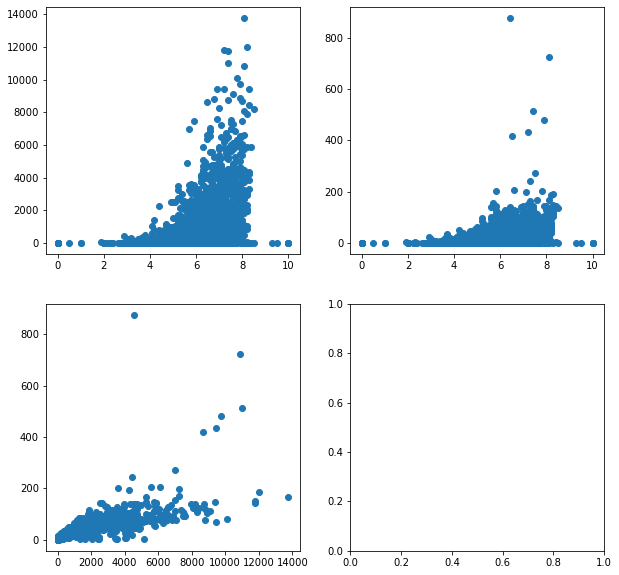

In [165]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].scatter(df["vote_average"], df["vote_count"])
ax[0,1].scatter(df["vote_average"], df["popularity"])
ax[1,0].scatter(df["vote_count"], df["popularity"])

In [166]:
#there is a record that has a high popularity with low vote count and vote average so let's delete it 
df = df[df["popularity"]<800]

In [167]:
df["normalized_pop"] = (df["popularity"]-min(df["popularity"]))/(max(df["popularity"])-min(df["popularity"]))
df["normalized_voting"] = (df["vote_average"]-min(df["vote_average"]))/(max(df["vote_average"])-min(df["vote_average"]))

In [168]:
df.describe()

,id,popularity,vote_average,vote_count,normalized_pop,normalized_voting
count,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,57133.308830,21.314439,6.092107,689.409829,0.029430,0.609211
std,88675.812556,29.334920,1.194728,1233.443229,0.040504,0.119473
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9013.750000,4.667650,5.600000,54.000000,0.006445,0.560000
50%,14626.500000,12.913104,6.200000,235.000000,0.017830,0.620000
75%,58589.750000,28.264356,6.800000,737.000000,0.039026,0.680000
max,459488.000000,724.247784,10.000000,13752.000000,1.000000,1.000000


# Popular based recommendation system

In [169]:
# we calculate our weighted rating score based on the the popularity and vote average with respect to having a high vote count
df["weighted_rating"] = 2.5*df["normalized_voting"]+df["normalized_pop"]
lim = np.percentile(df["vote_count"], 66)
top_movies = df[df["vote_count"]>lim]
top_movies = top_movies[["original_title", "weighted_rating", "popularity", "vote_average"]]
top_movies = top_movies.sort_values(["weighted_rating"], ascending=False)
top_movies = top_movies.reset_index()

In [170]:
top_movies.head(10)

,index,original_title,weighted_rating,popularity,vote_average
0,95,Interstellar,3.025000,724.247784,8.1
1,94,Guardians of the Galaxy,2.639274,481.098624,7.9
2,788,Deadpool,2.560489,514.569956,7.4
3,127,Mad Max: Fury Road,2.399627,434.278564,7.2
4,3865,Whiplash,2.340833,192.528841,8.3
5,1881,The Shawshank Redemption,2.313813,136.747729,8.5
6,65,The Dark Knight,2.308645,187.322927,8.2
7,3337,The Godfather,2.298357,143.659698,8.4
8,662,Fight Club,2.277634,146.757391,8.3
9,96,Inception,2.256390,167.583710,8.1
